In [1]:
import torch 
import matplotlib.pyplot as plt
torch.manual_seed(0)

In [2]:
def sample_objective(num_samples):
    return torch.sin(torch.randn(num_samples,1))
def sample_instrumental(num_samples):
    return torch.cos(1.5*torch.randn(num_samples,1))

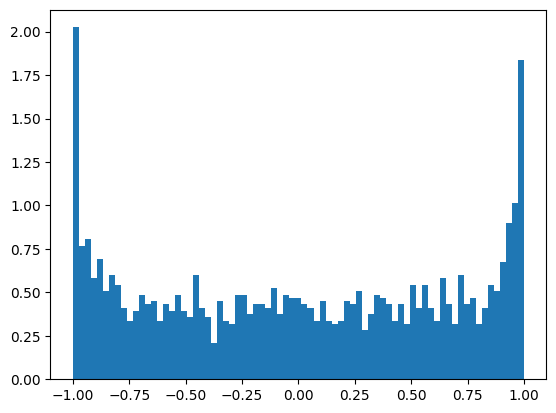

In [3]:
num_samples = 2000
x = sample_objective(num_samples)
plt.hist(x.numpy(),bins = 75, density = True)
plt.show()

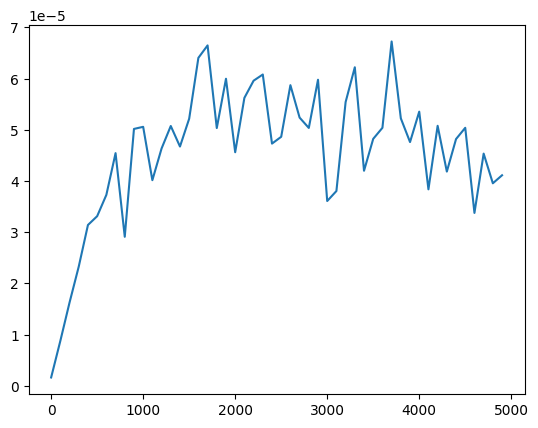

In [4]:
list_list_MSE =[]
for number_samples in range(0,5000,100):
    list_MSE = []
    for _ in range(50):
        samples = sample_objective(number_samples)
        stack = torch.cat([x,samples], dim =0)
        list_MSE.append(torch.square(torch.mean(stack)))
    list_list_MSE.append(list_MSE)
plt.plot(range(0,5000,100),[torch.mean(torch.tensor(list_MSE)) for list_MSE in list_list_MSE])

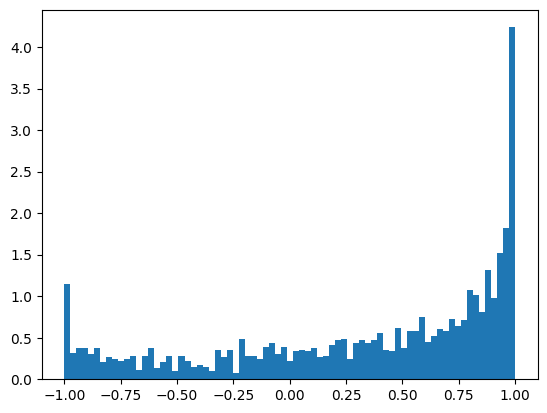

In [5]:
instrumental_samples = sample_instrumental(num_samples)
plt.hist(instrumental_samples.numpy(), bins = 75, density=True)
plt.show()

In [6]:
from classifiers import *
binary_classif = BinaryClassifier(instrumental_samples,x, [32,32,32])
binary_classif.train(500, lr = 5e-4)

AttributeError: 'range' object has no attribute 'set_postfix_str'

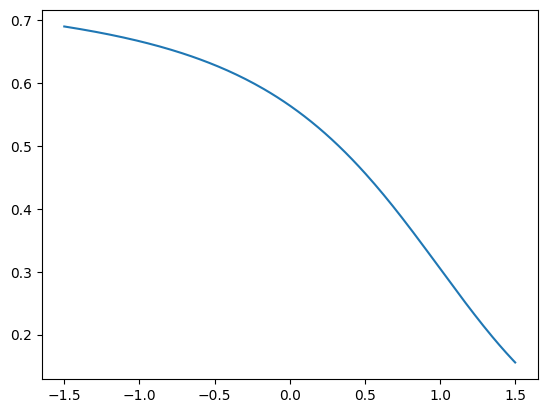

In [30]:
with torch.no_grad():
    tt =torch.linspace(-1.5,1.5,200)
    plt.plot(tt, torch.sigmoid(binary_classif.logit_r(tt.unsqueeze(-1))).numpy())
    plt.show()

In [22]:
def sample_IMH(number_steps, num_chains = num_samples):
    samples = torch.cos(1.5*torch.randn(num_chains,1))
    for _ in tqdm(range(number_steps)):
        proposed_samples = torch.cos(1.5*torch.randn(num_chains,1))
        mask = torch.rand(num_chains,1)<torch.exp(binary_classif.logit_r(proposed_samples) - binary_classif.logit_r(samples))
        samples = mask*proposed_samples + (~mask)*samples
    return samples

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 70.78it/s]


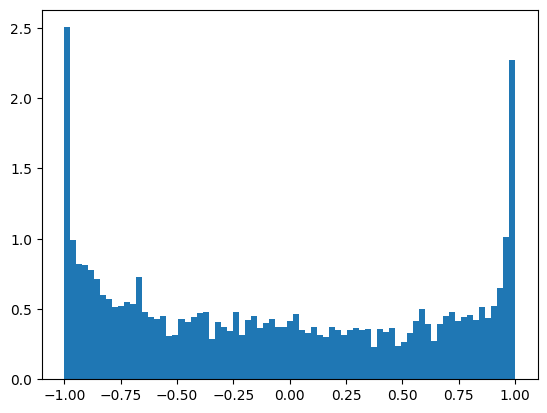

In [25]:
with torch.no_grad():
    samples = sample_IMH(50,5000)
plt.hist(samples.numpy(),bins = 75, density = True)
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 263.17it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 277.39it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 292.84it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 387.45it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 340.18it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 395.61it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 270.81it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 238.08it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 251.85it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 270.29it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 271.30it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 256.11it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 237.27it/s]


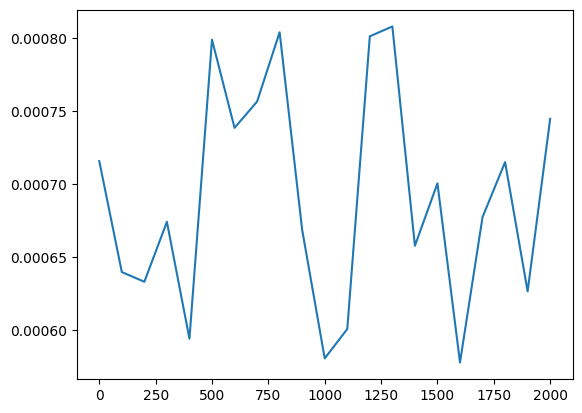

In [10]:
list_list_MSE =[]
for number_samples in range(0,2100,100):
    list_MSE = []
    for _ in range(50):
        samples = sample_IMH(10,num_chains=num_samples)
        stack = torch.cat([x,samples], dim =0)
        list_MSE.append(torch.square(torch.mean(stack)))
    list_list_MSE.append(list_MSE)
plt.plot(range(0,2100,100),[torch.mean(torch.tensor(list_MSE)) for list_MSE in list_list_MSE])
plt.show()